In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objs as go
import scipy.optimize as sco

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

import statsmodels.api as sm
from statsmodels import regression
from scipy.stats import linregress

from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreasantoro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreasantoro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# import the sentiment analysis data
df = pd.read_csv("Data_PCLab3_Twitter_Stock_Sentiment.csv")

# Task 1

## Data exploration & Descriptive Statistics

In [5]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [6]:
df.Sentiment.value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

The class distribution is imbalanced because there is a significant difference in the number of positive and negative sentiment tweets. In this case, the "1" class (positive sentiment) is the majority class, and the "0" class (negative sentiment) is the minority class.

Unbalanced datasets can pose challenges for ML models, especially when  dealing with classification tasks. Models trained on imbalanced data can become biased towards the majority class, leading to poor performance in predicting the minority class.

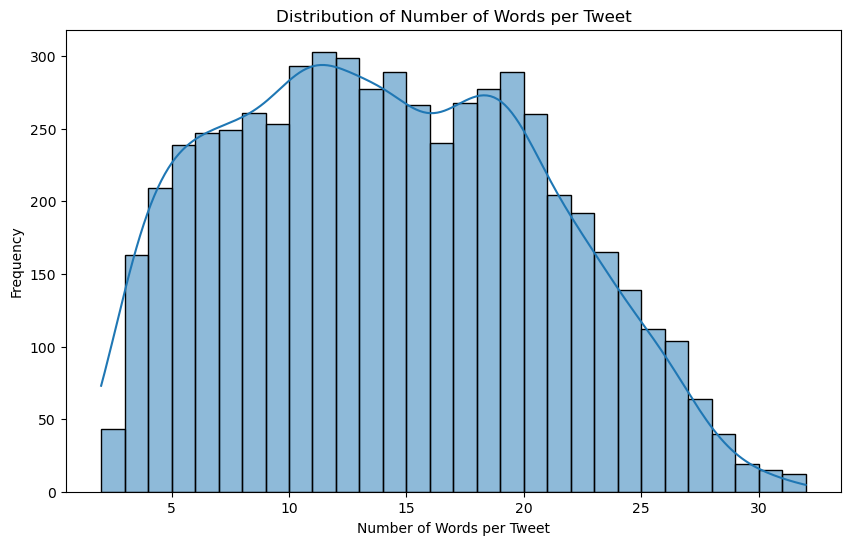

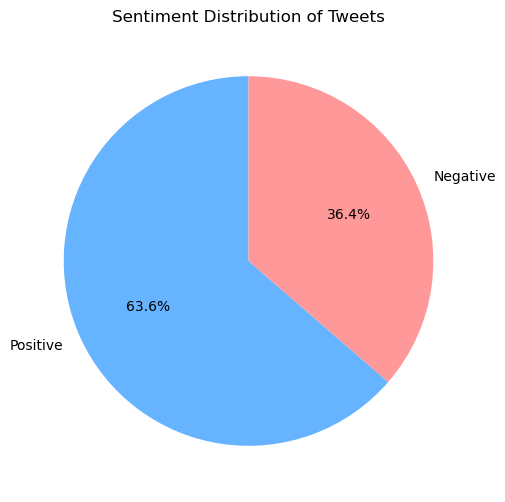

Number of Tweets: 5791
Average Number of Words per Tweet: 14.01
Average Sentiment: 0.64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with columns 'text' and 'sentiment'

# Count the number of tweets
num_tweets = len(df)

# Calculate the number of words per tweet
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))

# Create a histogram of the distribution of the number of words per tweet
plt.figure(figsize=(10, 6))
sns.histplot(df['num_words'], bins=30, kde=True)
plt.xlabel('Number of Words per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words per Tweet')
plt.show()

# Calculate the average sentiment
average_sentiment = df['Sentiment'].mean()

# Count the number of positive (Sentiment=1) and negative (sentiment=0) tweets
num_positive_tweets = df['Sentiment'].sum()
num_negative_tweets = num_tweets - num_positive_tweets

# Create a pie chart to visualize the sentiment distribution
labels = ['Positive', 'Negative']
sizes = [num_positive_tweets, num_negative_tweets]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sentiment Distribution of Tweets')
plt.show()

# Print the results
print(f"Number of Tweets: {num_tweets}")
print(f"Average Number of Words per Tweet: {df['num_words'].mean():.2f}")
print(f"Average Sentiment: {average_sentiment:.2f}")


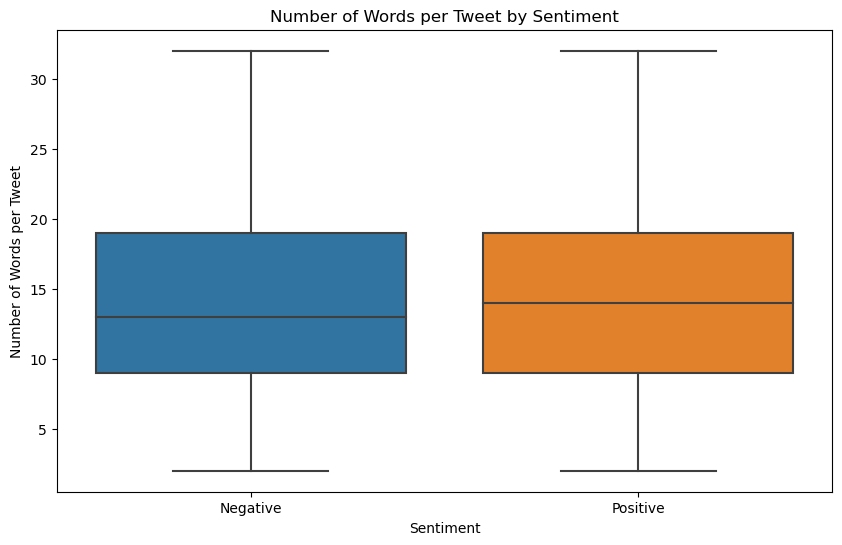

In [8]:
# Filter the DataFrame to get tweets with positive sentiment (sentiment=1)
positive_tweets = df[df['Sentiment'] == 1]

# Filter the DataFrame to get tweets with negative Sentiment (Sentiment=0)
negative_tweets = df[df['Sentiment'] == 0]

# Create box plots for positive and negative tweets
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='num_words', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Number of Words per Tweet')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Number of Words per Tweet by Sentiment')
plt.show()

No substantial difference between the two classes in terms of distribution of number of words.

# Task 2

## Cleaning tweets' text

In [9]:
# function to clean text
def clean_text(text):
    #lower text
    text = text.lower()
    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    #remove numbers
    text = re.sub(r'\d+', '', text)
    #remove whitespaces
    text = text.strip()
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    #remove double whitespaces
    text = re.sub(' +', ' ', text)

    return text


In [10]:
df['Cleaned_Text'] = df.Text.apply(clean_text)

### Trying the function with the test string

In [11]:
string_test = "$I love AI & Machine learning applied to Finance...!! ;)"
clean_text(string_test)

'i love ai machine learning applied to finance'

## Visualising the word cloud based on the sentiment

In [12]:
df.head(10)

,Text,Sentiment,num_words,Cleaned_Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,20,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,16,user aap movie return for the feageed indicato...
2,user I'd be afraid to short AMZN - they are lo...,1,18,user id be afraid to short amzn they are looki...
3,MNTA Over 12.00,1,3,mnta over
4,OI Over 21.37,1,3,oi over
5,PGNX Over 3.04,1,3,pgnx over
6,AAP - user if so then the current downtrend wi...,0,19,aap user if so then the current downtrend will...
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0,14,mondays relative weakness nyx win tie tap ice ...
8,GOOG - ower trend line channel test & volume s...,1,10,goog ower trend line channel test volume support
9,AAP will watch tomorrow for ONG entry.,1,7,aap will watch tomorrow for ong entry


In [13]:
#word cloud of the most frequent words in the tweets given the sentiment

def wordcloud(df, sentiment):
    df = df[df.Sentiment == sentiment]
    text = df.Cleaned_Text.values
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(text))
    return wordcloud

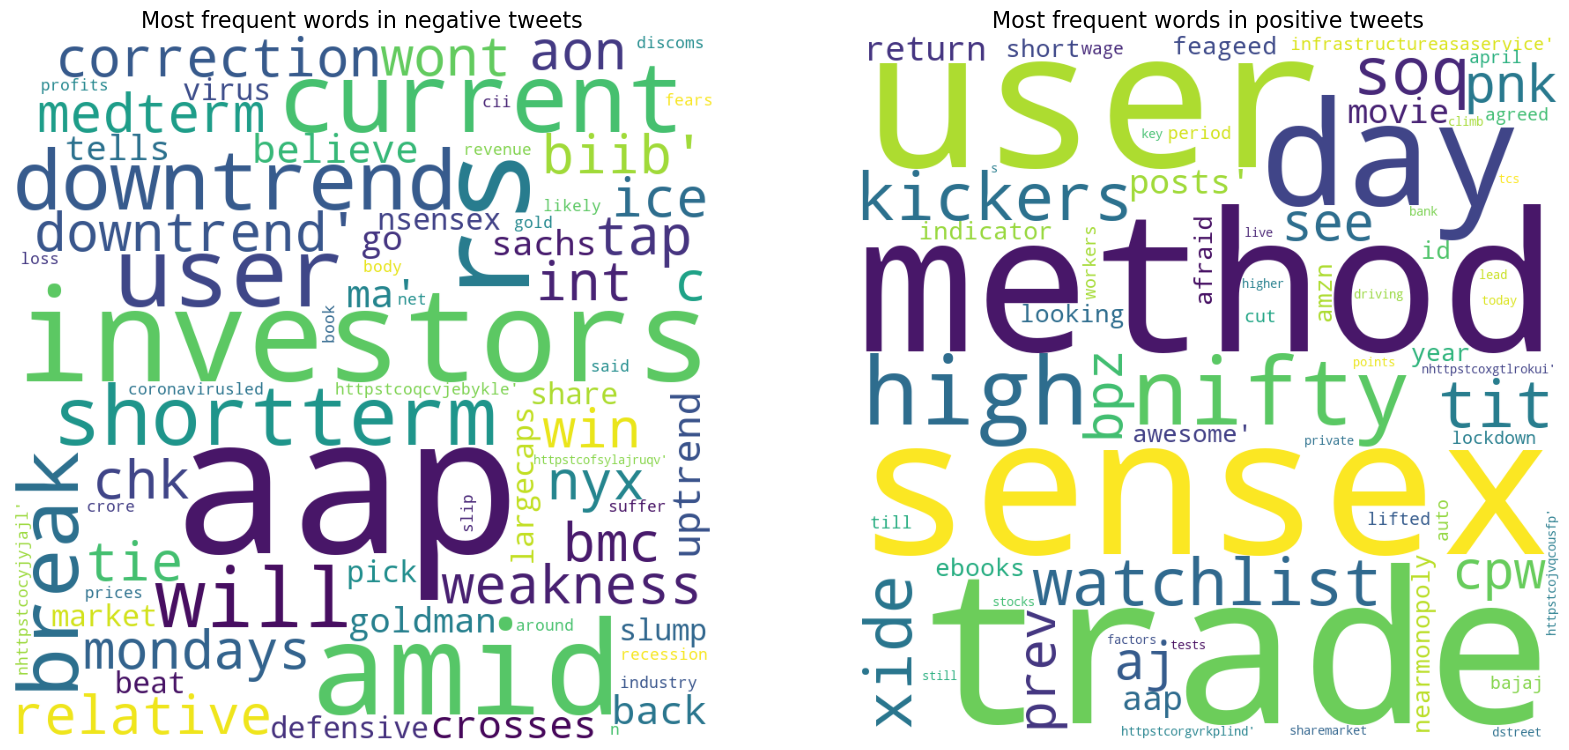

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(wordcloud(df, 0))
ax[0].axis("off")
ax[0].set_title("Most frequent words in negative tweets", fontsize=16)
ax[1].imshow(wordcloud(df, 1))
ax[1].axis("off")
ax[1].set_title("Most frequent words in positive tweets", fontsize=16)
plt.show();


**Negative Sentiment**: The words like "downtrend," "break," and "correction" suggest that negative sentiment tweets may be associated with discussions about market downturns, corrections, or short-term challenges. These words indicate a focus on unfavorable market conditions.

**Positive Sentiment**: The presence of words like "sensex," "trade," and "high" in positive sentiment tweets suggests a more optimistic tone related to stock trading and market performance. Words like "kickers" and "method" may indicate discussions about strategies and positive developments in the market.

## Unique words

In [15]:
# clean positive tweets
positive_tweets['Cleaned_Text'] = positive_tweets.Text.apply(clean_text)
negative_tweets['Cleaned_Text'] = negative_tweets.Text.apply(clean_text)

/var/folders/jx/dqd1k94518nb74stqdt5mnc40000gn/T/ipykernel_33337/3947739629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets['Cleaned_Text'] = positive_tweets.Text.apply(clean_text)
/var/folders/jx/dqd1k94518nb74stqdt5mnc40000gn/T/ipykernel_33337/3947739629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['Cleaned_Text'] = negative_tweets.Text.apply(clean_text)


In [16]:
# number of unique words in the tweets
unique_words = set()
for text in df.Cleaned_Text:
    for word in text.split():
        unique_words.add(word)

print(f"The number of unique words in our dataset is: \t {len(unique_words)}")

# print the number of unique words in the tweets with positive sentiment
positive_unique_words = set()
for text in positive_tweets.Cleaned_Text:
    for word in text.split():
        positive_unique_words.add(word)

print(f"The number of unique words in the positive tweets is: \t {len(positive_unique_words)}")

# print the number of unique words in the tweets with negative sentiment
negative_unique_words = set()
for text in negative_tweets.Cleaned_Text:
    for word in text.split():
        negative_unique_words.add(word)

print(f"The number of unique words in the negative tweets is: \t {len(negative_unique_words)}")


The number of unique words in our dataset is: 	 9751
The number of unique words in the positive tweets is: 	 7025
The number of unique words in the negative tweets is: 	 5516


This indicates that positive sentiment tweets tend to use a wider range of unique words compared to negative sentiment tweets, potentially reflecting more diverse topics or discussions.

# Task 3

## Preliminary steps to actual training

In [17]:

# tokenize the text cleaned using NLTK 
def tokenize(text):
    return word_tokenize(text)

df['Tokenized_Text'] = df.Cleaned_Text.apply(tokenize)


# vectorize the tweets using the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.Cleaned_Text)
y = df.Sentiment.values




In [18]:
#train split test 10% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)



## Training the model

### Basic Model: Logistic Regression

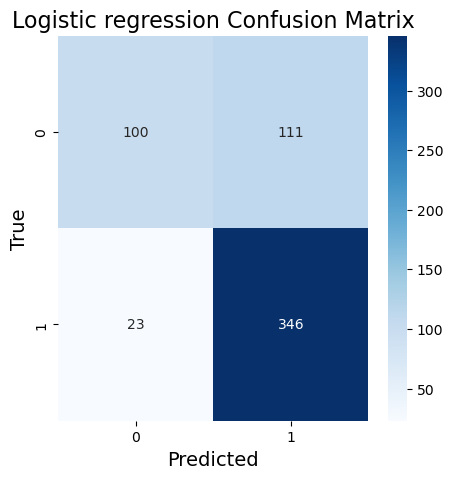

The classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.47      0.60       211
           1       0.76      0.94      0.84       369

    accuracy                           0.77       580
   macro avg       0.79      0.71      0.72       580
weighted avg       0.78      0.77      0.75       580



In [19]:
#train the model using the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_lr = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm_lr = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_lr, annot=True, ax=ax, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_title('Logistic regression Confusion Matrix', fontsize=16)
plt.show();
print(f"The classification report is: \n {classification_report(y_test, y_pred_lr)}")


As we can see in the confusion matrix, the logistic regression model seems able to correctly classify positive tweets, while it seems to incorrectly classify negative tweets (50% of the times). This indicates that this model tends to classify tweets as positive.

### More advanced stuff: RNN

2023-10-05 09:47:06.295448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 09:47:06.401743: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-05 09:47:06.408778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-05 09:47:06.408801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

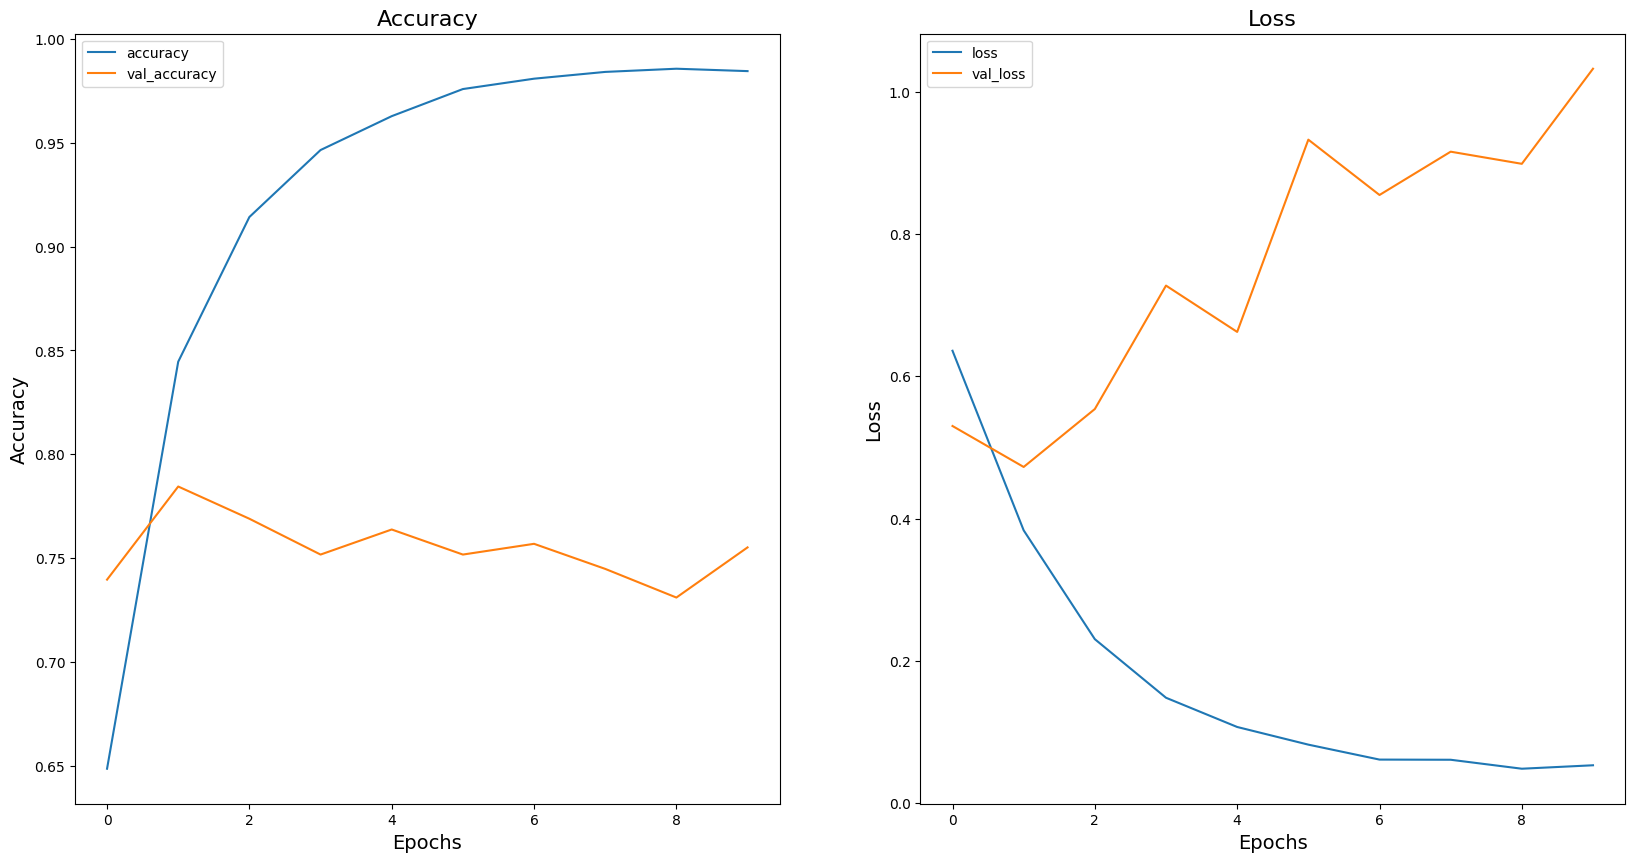

In [ ]:
#now use the RNN model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize the text cleaned using Keras and vectorize the tweets using the TF-IDF vectorizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.Cleaned_Text)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(f"The size of the vocabulary is: \t {vocab_size}")

X = tokenizer.texts_to_sequences(df.Cleaned_Text)
X = pad_sequences(X, padding='post')
y = df.Sentiment.values

#train split test 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

#build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32, input_length=X.shape[1]),
    tf.keras.layers.LSTM(64, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

#plot the accuracy and loss of the model
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(history.history['accuracy'], label='accuracy')
ax[0].plot(history.history['val_accuracy'], label='val_accuracy')
ax[0].set_title('Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend()
ax[1].plot(history.history['loss'], label='loss')
ax[1].plot(history.history['val_loss'], label='val_loss')
ax[1].set_title('Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend()
plt.show();


In [ ]:
y_pred_rnn = model.predict(X_test)
y_pred_rnn = [1 if elem[0] > 0.5 else 0 for elem in y_pred_rnn]

19/19 [==============================] - 0s 9ms/step


In [ ]:
# saving the prediction in a csv file
rnn_df = pd.DataFrame(y_pred_rnn)
rnn_df.to_csv('RNN_predictions')
#saving the model
model.save('RNN_model')

In [20]:
# read the predictions made using the RNN model
rnn_predictions = pd.read_csv('RNN_predictions.csv').drop('Unnamed: 0', axis=1)
# rename column 0 as Label
rnn_predictions = rnn_predictions.rename(columns={'0': 'Label'})

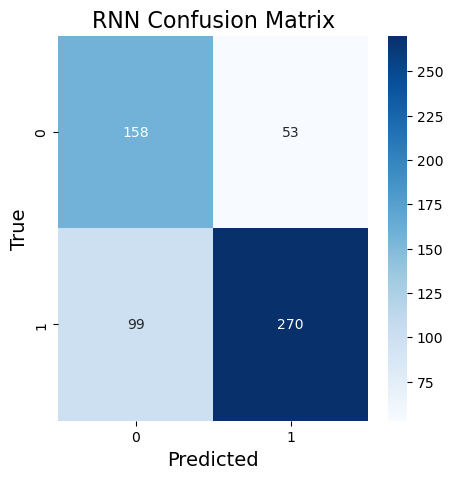

The classification report is: 
               precision    recall  f1-score   support

           0       0.61      0.75      0.68       211
           1       0.84      0.73      0.78       369

    accuracy                           0.74       580
   macro avg       0.73      0.74      0.73       580
weighted avg       0.76      0.74      0.74       580



In [21]:
# plot confusion matrix for RNN model

cm_rnn = confusion_matrix(y_test, rnn_predictions.Label)

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_rnn, annot=True, ax=ax, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_title('RNN Confusion Matrix', fontsize=16)
plt.show();
print(f"The classification report is: \n {classification_report(y_test, rnn_predictions.Label)}")

The accuracy obtained from this RNN model is lower than the accuracy of the previous logistic regression, but if we look at the confusion matrix results, we can note that the RNN model does not tend to always predict tweets as positive.

# Task 4 Optional: using BERT as classifier

In [ ]:
!pip install transformers==4.33.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.9/738.9 kB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 32.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## using BERT as classifier

In [ ]:
from transformers import pipeline

# creating the pipeline for sentiment analysis using the pre-trained model sentiment-roberta-large-english
pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# making the predictions
prediction_row = pipe(df.Cleaned_Text.tolist())

In [ ]:
# saving the predictions in csv file
bert_df = pd.DataFrame(prediction_row)
bert_df.to_csv('bert_sentiment_analysis')

In [22]:
bert_predictions = pd.read_csv('bert_sentiment_analysis.csv').drop('Unnamed: 0', axis=1)
# change positive with 1 and negative with 0
bert_predictions['label'] = bert_predictions['label'].replace('POSITIVE', 1)
bert_predictions['label'] = bert_predictions['label'].replace('NEGATIVE', 0)

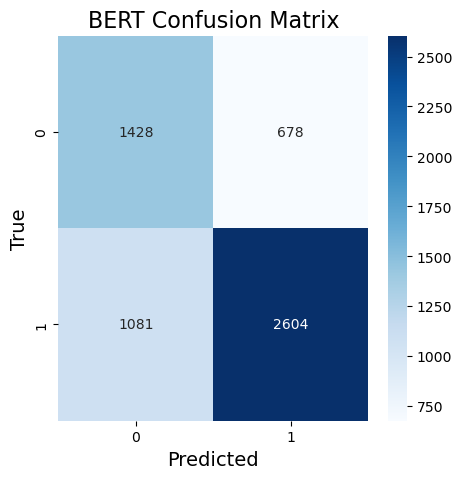

The classification report is: 
               precision    recall  f1-score   support

           0       0.57      0.68      0.62      2106
           1       0.79      0.71      0.75      3685

    accuracy                           0.70      5791
   macro avg       0.68      0.69      0.68      5791
weighted avg       0.71      0.70      0.70      5791



In [23]:
# plot confusion matrix for bert model

cm_bert = confusion_matrix(df.Sentiment, bert_predictions.label)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_bert, annot=True, ax=ax, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('True', fontsize=14)
ax.set_title('BERT Confusion Matrix', fontsize=16)
plt.show();
print(f"The classification report is: \n {classification_report(df.Sentiment, bert_predictions.label)}")

## using FinBERT as classifier

In [ ]:
# creating the pipeline for sentiment analysis using the pre-trained model FinBERT
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [ ]:
# making the predictions
prediction_row2 = pipe(df.Cleaned_Text.tolist())

In [ ]:
# saving the predictions in csv file
finbert_df = pd.DataFrame(prediction_row2)
finbert_df.to_csv('finbert_sentiment_analysis')

In [ ]:
finbert_predictions = pd.read_csv('finbert_sentiment_analysis.csv').drop('Unnamed: 0', axis=1)


In [ ]:
finbert_predictions.label.value_counts()

neutral     3682
positive    1117
negative     992
Name: label, dtype: int64

FinBert is a model not well suited for the data at our disposal, this is due to the fact that our data only contains 'positive' and 'negative' as values for the sentiment of a tweet while this model also considers a third class 'neutral'.

Having said so, the perfomance of the model seems not so satisfactory, considering the fact that it predicts 'neutral' for aprox. 64% of our observations.

# Task 5

In [24]:
# read the csv file with tickers and returns
close_prices = pd.read_csv('close_price.csv')

In [25]:
# take the list of tickers
tickers = close_prices.columns[1:]

In [26]:
# for each stock we calculate the numbers of tweets mentioning them
tweets_per_ticker = {}

# loop over the tweets
for tweet, label in df[['Text', 'Sentiment']].values:
    # loop over the tickers
    for ticker in tickers:
        # writing the regex to find
        regex = r"\b" + re.escape(ticker) + r"\b"
        # check if the ticker is in the tweet
        if ticker in re.findall(regex, tweet):
            # check if the ticker is already in the dictionary
            if ticker not in tweets_per_ticker:
                if label == 1:
                    tweets_per_ticker[ticker] = [1,1,0]
                else:
                    tweets_per_ticker[ticker] = [1,0,1]

            else:
                tweets_per_ticker[ticker][0] += 1
                
                if label == 1:
                    tweets_per_ticker[ticker][1] += 1
                else:
                    tweets_per_ticker[ticker][2] += 1
                


In [27]:
# transform the dictionary in df 
tweets_per_ticker_df = pd.DataFrame.from_dict(tweets_per_ticker, orient='index', columns=['total', 'positive', 'negative'])

In [28]:
tweets_per_ticker_df.head()

,total,positive,negative
AMZN,105,58,47
AON,6,5,1
BIIB,3,2,1
C,37,28,9
ICE,6,0,6


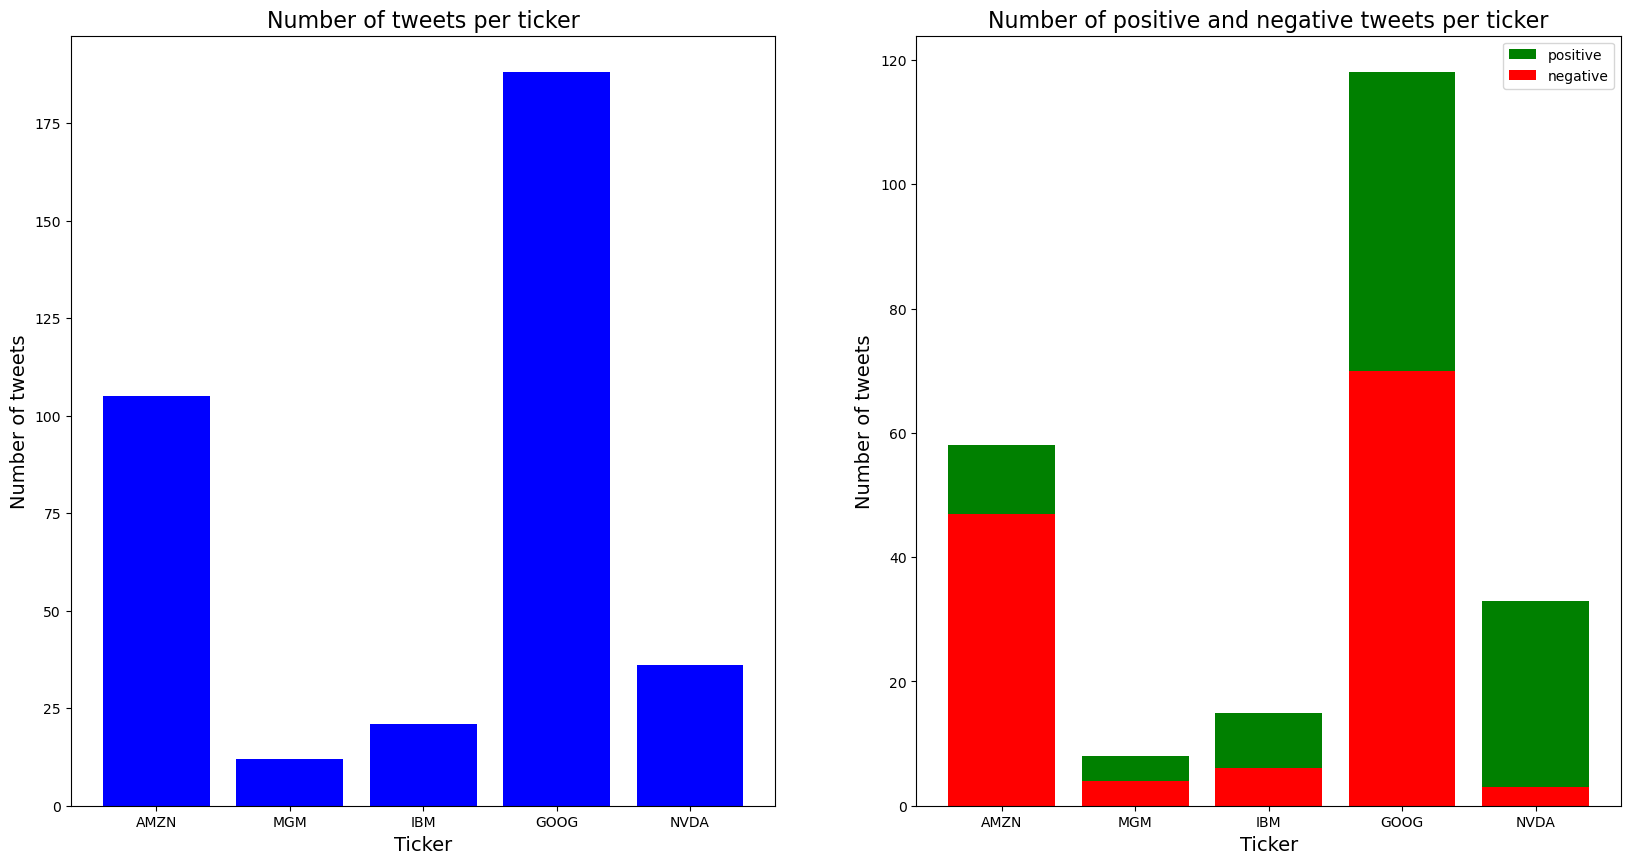

In [29]:
# plot the number of tweets per ticker and the number of positive and negative tweets per ticker just for AMZN, AAPL, GOOG, IBM, TSLA
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].bar(tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].index, tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].total, color='blue', label='total tweets')
ax[0].set_title('Number of tweets per ticker', fontsize=16)
ax[0].set_xlabel('Ticker', fontsize=14)
ax[0].set_ylabel('Number of tweets', fontsize=14)
ax[1].bar(tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].index, tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].positive, color='green', label='positive')
ax[1].bar(tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].index, tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].negative, color='red', label='negative')
ax[1].set_title('Number of positive and negative tweets per ticker', fontsize=16)
ax[1].set_xlabel('Ticker', fontsize=14)
ax[1].set_ylabel('Number of tweets', fontsize=14)
ax[1].legend()
plt.show();

As media attention feature, we decided to compute the ratio between positive and negative tweets for each stock, because we consider reasonable to think that stocks with more positive mentions should obtain higher returns than sotcks mentioned in a negative way.

In [30]:
# add columns computing the ratio between positive and negative tweets and the total number of tweets
tweets_per_ticker_df['pos_neg_ratio'] = tweets_per_ticker_df.positive / tweets_per_ticker_df.negative

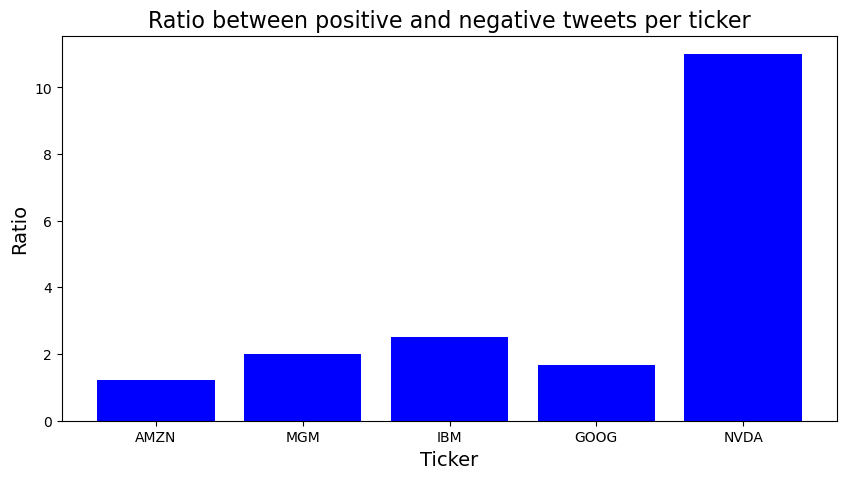

In [31]:
# plot the ratio between positive and negative tweets per ticker
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].index, tweets_per_ticker_df.loc[['AMZN', 'MGM', 'IBM', 'GOOG', 'NVDA'],:].pos_neg_ratio, color='blue')
ax.set_title('Ratio between positive and negative tweets per ticker', fontsize=16)
ax.set_xlabel('Ticker', fontsize=14)
ax.set_ylabel('Ratio', fontsize=14)
plt.show();

## Task 5 optional

In [35]:
# now we use the data scraped in the previous lab about the stock prices of S&P500 companies
data = pd.read_csv('stock_prices.csv')
# convert data into datetime format
data['Date'] = pd.to_datetime(data['Date'])

# set date as index
data.set_index('Date', inplace=True)
data.head()

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-12,25.491037,5.703587,12.774082,21.086281,12.403333,43.430721,29.230000,28.315744,21.372660,36.905300,...,18.013937,81.632050,12.698454,81.983963,18.174055,52.803738,33.230148,21.914742,48.428432,34.990002
2012-01-13,25.194330,5.628166,12.726189,21.189495,12.390000,42.875160,28.969999,27.792078,21.394659,36.898575,...,17.790909,81.674301,12.928638,80.527954,18.214920,52.890965,32.956188,21.855059,48.410843,34.970001
2012-01-17,25.794193,5.543320,12.874423,21.296530,12.313333,43.068394,29.350000,28.110828,21.108620,37.375343,...,17.883841,81.294212,12.960608,83.551979,18.180868,53.395710,32.965324,21.855059,48.542767,35.549999
2012-01-18,26.619822,5.694160,13.008112,21.162739,12.320000,44.243942,29.889999,29.712173,21.431332,37.939396,...,18.195143,82.075470,13.146029,87.218117,18.262579,53.869289,33.915016,23.014738,48.859409,36.540001
2012-01-19,26.993925,5.901561,12.966879,21.189495,12.296667,44.123165,30.240000,30.106823,21.578024,38.207993,...,18.436762,81.420914,13.433766,87.621292,18.105965,54.230694,34.691223,22.699236,49.378349,37.259998


In [36]:
# compute the daily returns
def daily_returns(df):
    return df.pct_change(1)

# create the df
df_daily_returns = daily_returns(data)
df_daily_returns.head()

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,-0.011640,-0.013223,-0.003749,0.004895,-0.001075,-0.012792,-0.008895,-0.018494,0.001029,-0.000182,...,-0.012381,0.000518,0.018127,-0.017760,0.002249,0.001652,-0.008244,-0.002723,-0.000363,-0.000572
2012-01-17,0.023809,-0.015075,0.011648,0.005051,-0.006188,0.004507,0.013117,0.011469,-0.013370,0.012921,...,0.005224,-0.004654,0.002473,0.037552,-0.001869,0.009543,0.000277,0.000000,0.002725,0.016586
2012-01-18,0.032008,0.027211,0.010384,-0.006282,0.000541,0.027295,0.018399,0.056965,0.015288,0.015092,...,0.017407,0.009610,0.014306,0.043879,0.004494,0.008869,0.028809,0.053062,0.006523,0.027848
2012-01-19,0.014054,0.036424,-0.003170,0.001264,-0.001894,-0.002730,0.011710,0.013282,0.006845,0.007080,...,0.013279,-0.007975,0.021888,0.004623,-0.008576,0.006709,0.022887,-0.013709,0.010621,0.019704


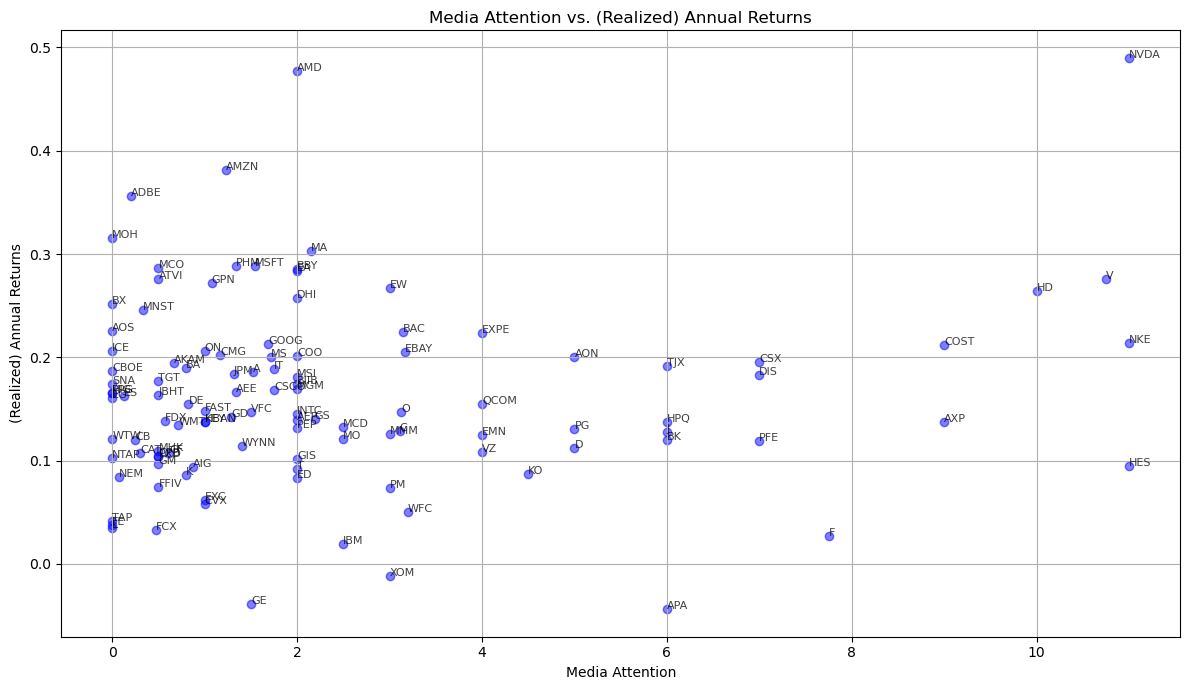

In [37]:
# Compute the annual returns for each stock in the df_daily_returns dataframe
annual_returns = df_daily_returns.mean() * 252

# Extract the matched statistics for the stocks
matched_stats = tweets_per_ticker_df.reindex(annual_returns.index)['pos_neg_ratio']

# Plotting
plt.figure(figsize=(12,7))
plt.scatter(matched_stats, annual_returns, color='blue', alpha=0.5)  # Invert x and y values

# Annotate each point with its stock name
for stock_name, x, y in zip(annual_returns.index, matched_stats, annual_returns):
    plt.annotate(stock_name, (x, y), fontsize=8, alpha=0.75)

plt.title('Media Attention vs. (Realized) Annual Returns')  # Update the title
plt.xlabel('Media Attention')  # Update the x-axis label
plt.ylabel('(Realized) Annual Returns')  # Update the y-axis label
plt.grid(True)
plt.tight_layout()
plt.show()


Given this scatterplot, the media attention seems not to be correlated with the realized annual returns of the stocks.
Indeed, there are high values of media attention both with high and low annual returns, representing no correlation between the two variables.

In [38]:
def linreg(x,y):
    X1 = sm.add_constant(x)
    model = regression.linear_model.OLS(y,X1)
    results = model.fit()

    # we collect both the values for alpha and beta and their p-values to check statistical significance
    return results.params[0], results.params[1],f'{results.pvalues[0]: .5f}', f'{results.pvalues[1]: .5f}'

def compute_betas(tickers, stock_returns):
    """
    Compute beta values for a list of stocks based on historical returns.

    Parameters:
    - tickers (list): List of stock tickers.
    - stock_returns (pd.DataFrame): DataFrame with stock returns data for each ticker.
    - market_returns (pd.Series): Series with market returns data.

    Returns:
    - pd.DataFrame: DataFrame with beta values for each stock.
    """
    results_dict = {}

    # Loop through each stock
    for stock in tickers:
        X = stock_returns['sp500'].values[1:] # Market returns
        Y = stock_returns[stock].values[1:] # Stock returns

        # Calculate alpha, beta, and p-values
        alpha, beta, pvalue_alpha, pvalue_beta = linreg(X, Y)

        results_dict[stock] = [alpha, beta, pvalue_alpha, pvalue_beta]

    # Create a DataFrame with the results
    df_reg_results = pd.DataFrame(results_dict, index=['alpha', 'beta', 'pvalue_alpha', 'pvalue_beta']).T

    return df_reg_results


In [39]:
market = pd.read_csv('Data_PCLab1_Stock.csv')
# convert data into datetime format
market['Date'] = pd.to_datetime(market['Date'])

# set date as index
market.set_index('Date', inplace=True)
market = market[['sp500']]


# create the daily for market
market_daily_returns = daily_returns(market)
market_daily_returns.head()

,sp500
Date,
2012-01-12,NaN
2012-01-13,-0.004948
2012-01-17,0.003553
2012-01-18,0.011108
2012-01-19,0.004939


In [40]:
df_daily_returns['sp500'] = market_daily_returns

In [41]:
capm = compute_betas(df_daily_returns.columns,df_daily_returns)
capm

,alpha,beta,pvalue_alpha,pvalue_beta
A,0.000198,1.091254,0.41729,0.00000
AAL,0.00024,1.344051,0.69604,0.00000
AAPL,0.000596,1.112586,0.03874,0.00000
ABT,0.000328,0.941431,0.12532,0.00000
ACGL,0.000093,0.949477,0.69191,0.00000
...,...,...,...,...
XRAY,-0.000175,0.876673,0.52809,0.00000
XYL,0.000172,1.114569,0.49873,0.00000
ZBH,0.000125,0.944289,0.64783,0.00000
ZBRA,0.000628,1.212939,0.12347,0.00000


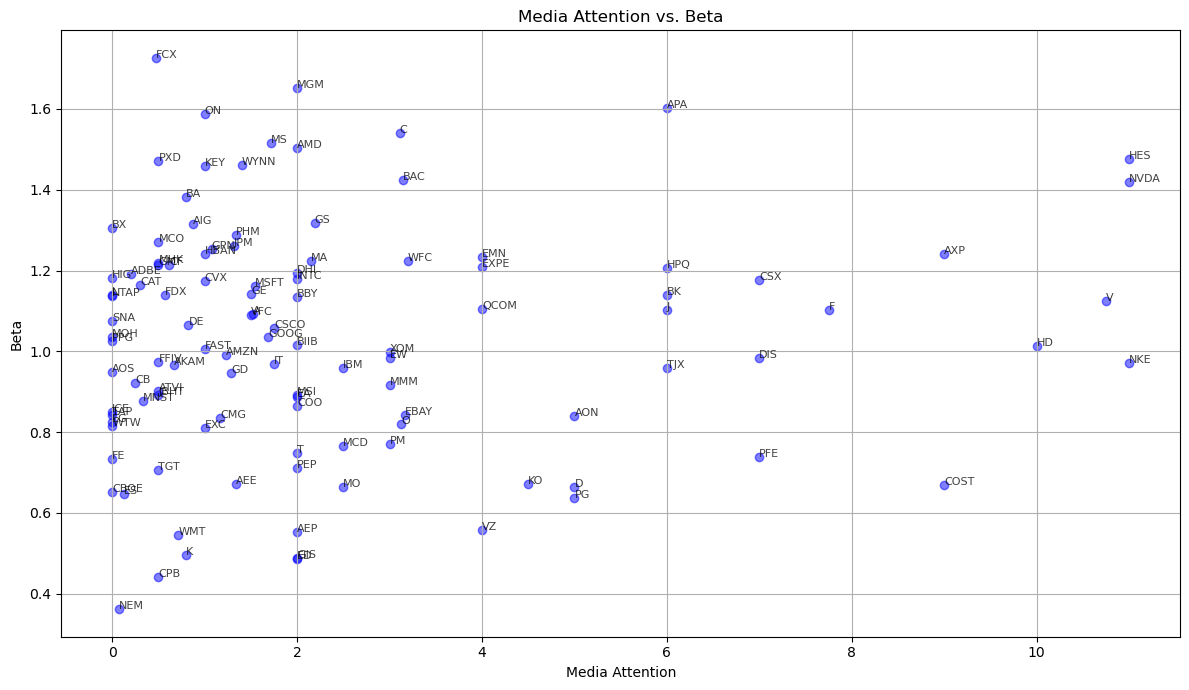

In [42]:
# Extract the matched statistics for the stocks
matched_stats = tweets_per_ticker_df.reindex(annual_returns.index)['pos_neg_ratio']

# Plotting
plt.figure(figsize=(12,7))
plt.scatter(matched_stats, capm.beta[:-1], color='blue', alpha=0.5)  # Invert x and y values

# Annotate each point with its stock name
for stock_name, x, y in zip(capm.beta[:-1].index, matched_stats, capm.beta[:-1]):
    plt.annotate(stock_name, (x, y), fontsize=8, alpha=0.75)

plt.title('Media Attention vs. Beta')  # Update the title
plt.xlabel('Media Attention')  # Update the x-axis label
plt.ylabel('Beta')  # Update the y-axis label
plt.grid(True)
plt.tight_layout()
plt.show()


As shown in class, we should always check if our factor is correlated or not with beta, this because if there is correlation between the factor and the beta, we're not discovering a new factor but simply a proxy for beta.

For this reason, it's important to analyze the relation with beta: as it's clear from the graph, there is no correlation between our factor and beta.
Thus, media attention (the ratio between positive and negative tweets of each stock) is a plausible candidate for being a relevant factor.

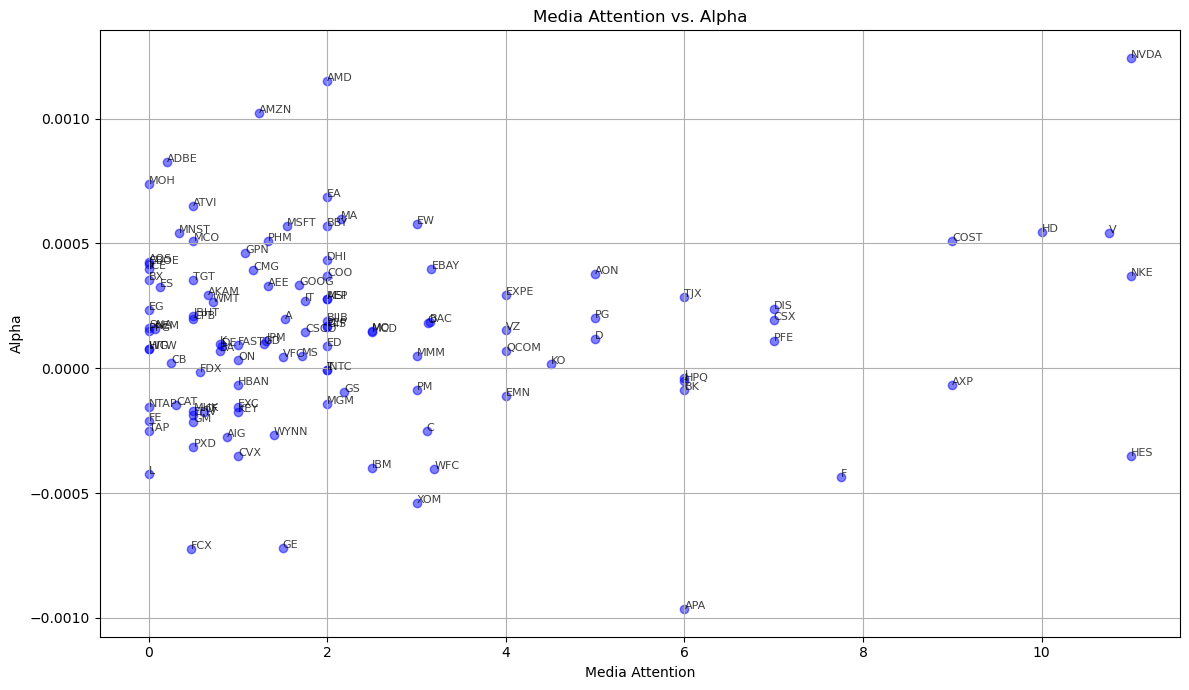

In [43]:
# Extract the matched statistics for the stocks
matched_stats = tweets_per_ticker_df.reindex(annual_returns.index)['pos_neg_ratio']

# Plotting
plt.figure(figsize=(12,7))
plt.scatter(matched_stats, capm.alpha[:-1], color='blue', alpha=0.5)  # Invert x and y values

# Annotate each point with its stock name
for stock_name, x, y in zip(capm.alpha[:-1].index, matched_stats, capm.alpha[:-1]):
    plt.annotate(stock_name, (x, y), fontsize=8, alpha=0.75)

plt.title('Media Attention vs. Alpha')  # Update the title
plt.xlabel('Media Attention')  # Update the x-axis label
plt.ylabel('Alpha')  # Update the y-axis label
plt.grid(True)
plt.tight_layout()
plt.show()


Unfortunately, there is also no correlation between our factor and alpha (excess return).
This makes our factor useless as it is not able to predict future returns.

An important remark to be made is that we have few significant values for alpha (we cannot reject the null hypothesis of alpha=0), since the majority of the correpsonding p-values are high (so even if a correlation with the factor was found, we should still be cautious with the goodnes of our factor).